In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import sys
import datetime
import nltk
from nltk.tokenize import word_tokenize
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from collections import OrderedDict
import operator

pd.options.mode.chained_assignment = None

In [2]:
df = pd.read_csv('from2015.csv')

In [3]:
df.columns

Index(['Unnamed: 0', 'DR_NO', 'Date Rptd', 'DATE OCC', 'TIME OCC', 'AREA ',
       'AREA NAME', 'Rpt Dist No', 'Part 1-2', 'Crm Cd', 'Crm Cd Desc',
       'Mocodes', 'Vict Age', 'Vict Sex', 'Vict Descent', 'Premis Cd',
       'Premis Desc', 'Weapon Used Cd', 'Weapon Desc', 'Status', 'Status Desc',
       'Crm Cd 1', 'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4', 'LOCATION',
       'Cross Street', 'LAT', 'LON'],
      dtype='object')

In [4]:
select_col = ['DATE OCC', 'TIME OCC', 'AREA NAME', 'Crm Cd', 'Crm Cd Desc','Vict Age', 'Vict Sex', 'Premis Desc',
              'LOCATION', 'LAT', 'LON']

In [6]:
data = df.loc[:, select_col]

In [10]:
data['TIME OCC'] = [str(i).zfill(4) for i in data['TIME OCC']]

In [11]:
data['TIME OCC'].head()

0    1000
1    2030
2    1200
3    1800
4    1130
Name: TIME OCC, dtype: object

# Crime별 분류

In [12]:
data.head()

,DATE OCC,TIME OCC,AREA NAME,Crm Cd,Crm Cd Desc,Vict Age,Vict Sex,Premis Desc,LOCATION,LAT,LON
0,NaN,1000,Southwest,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",36,M,STREET,2800 S HARVARD BL,34.0300,-118.3066
1,NaN,2030,Olympic,761,BRANDISH WEAPON,36,F,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",1200 S MARIPOSA AV,34.0491,-118.2989
2,NaN,1200,Newton,440,THEFT PLAIN - PETTY ($950 & UNDER),24,F,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",200 W 27TH ST,34.0248,-118.2715
3,NaN,1800,Olympic,330,BURGLARY FROM VEHICLE,69,M,STREET,WASHINGTON BL,34.0400,-118.3057
4,NaN,1130,Southwest,624,BATTERY - SIMPLE ASSAULT,68,F,MEDICAL/DENTAL OFFICES,3800 S WESTERN AV,34.0146,-118.3130


## Crm Cd Desc Word Count 

In [13]:
crm = data['Crm Cd']
crm_de = data['Crm Cd Desc']
data = pd.concat([data, pd.DataFrame(columns=['Crime', 'Year', 'Month', 'Day'])], sort = False)

data.head()

,DATE OCC,TIME OCC,AREA NAME,Crm Cd,Crm Cd Desc,Vict Age,Vict Sex,Premis Desc,LOCATION,LAT,LON,Crime,Year,Month,Day
0,NaN,1000,Southwest,230.0,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",36.0,M,STREET,2800 S HARVARD BL,34.0300,-118.3066,NaN,NaN,NaN,NaN
1,NaN,2030,Olympic,761.0,BRANDISH WEAPON,36.0,F,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",1200 S MARIPOSA AV,34.0491,-118.2989,NaN,NaN,NaN,NaN
2,NaN,1200,Newton,440.0,THEFT PLAIN - PETTY ($950 & UNDER),24.0,F,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",200 W 27TH ST,34.0248,-118.2715,NaN,NaN,NaN,NaN
3,NaN,1800,Olympic,330.0,BURGLARY FROM VEHICLE,69.0,M,STREET,WASHINGTON BL,34.0400,-118.3057,NaN,NaN,NaN,NaN
4,NaN,1130,Southwest,624.0,BATTERY - SIMPLE ASSAULT,68.0,F,MEDICAL/DENTAL OFFICES,3800 S WESTERN AV,34.0146,-118.3130,NaN,NaN,NaN,NaN


In [7]:
crime_dict = {}
count = 0

for i in data['Crm Cd Desc']:
    if count == 0:
        count += 1
    else:
        count += 1
        stop_words = set(stopwords.words('English'))
        tokenizer = RegexpTokenizer('r\W+|\w+')
        word_tokens = tokenizer.tokenize(i)
        filtered_sentence = [w for w in word_tokens if (not w in stop_words) and (not w.isnumeric())]
    
        for w in filtered_sentence:
            if w not in crime_dict:
                crime_dict[w] = 1
            else:
                crime_dict[w] = crime_dict[w] + 1

0 번째 진행 중
10000 번째 진행 중
20000 번째 진행 중
30000 번째 진행 중
40000 번째 진행 중
50000 번째 진행 중
60000 번째 진행 중
70000 번째 진행 중
80000 번째 진행 중
90000 번째 진행 중
100000 번째 진행 중
110000 번째 진행 중
120000 번째 진행 중
130000 번째 진행 중
140000 번째 진행 중
150000 번째 진행 중
160000 번째 진행 중
170000 번째 진행 중
180000 번째 진행 중
190000 번째 진행 중
200000 번째 진행 중
210000 번째 진행 중
220000 번째 진행 중
230000 번째 진행 중
240000 번째 진행 중
250000 번째 진행 중
260000 번째 진행 중
270000 번째 진행 중
280000 번째 진행 중
290000 번째 진행 중
300000 번째 진행 중
310000 번째 진행 중
320000 번째 진행 중
330000 번째 진행 중
340000 번째 진행 중
350000 번째 진행 중
360000 번째 진행 중
370000 번째 진행 중
380000 번째 진행 중
390000 번째 진행 중
400000 번째 진행 중
410000 번째 진행 중
420000 번째 진행 중
430000 번째 진행 중
440000 번째 진행 중
450000 번째 진행 중
460000 번째 진행 중
470000 번째 진행 중
480000 번째 진행 중
490000 번째 진행 중
500000 번째 진행 중
510000 번째 진행 중
520000 번째 진행 중
530000 번째 진행 중
540000 번째 진행 중
550000 번째 진행 중
560000 번째 진행 중
570000 번째 진행 중
580000 번째 진행 중
590000 번째 진행 중
600000 번째 진행 중
610000 번째 진행 중
620000 번째 진행 중
630000 번째 진행 중
640000 번째 진행 중
650000 번째 진행 중
660000 번째 진행 중
670000 번째

In [8]:
sorted_d = dict(sorted(crime_dict.items(), key = operator.itemgetter(1), reverse = True))

In [9]:
pd.DataFrame(sorted_d.items(), columns=['Word', 'Count']).to_csv('word_count.csv')

In [10]:
i=0
leng = len(data)

In [11]:
crime_dic ={"ROBBERY": "Robbery",
            "WEAPON" : "Weapon",
            "CHILD" : "Child",
            "ASSAULT" : "Assault",
            "SHOT" : "Shot",
            "BURGLARY" : "Burglary",
            "THEFT" : "Theft",
            "SHOPLIFTING" : "Shoplifting",
            "STOLEN" : "Stolen",
            "VANDALISM" : "Vandalism",
            "TRESPASSING" : "Trespassing",
            "CALLS" : "Calls"
}

In [12]:
new_crime = []
for i in range(len(data)):
    if crm[i] > 100 and crm[i] < 200:
        new_crime.append('Merder and Rape')
    else:
        for key in crime_dic:
            if key in crm_de[i]:
                result = crime_dic[key]
                break
            else:
                result = 'Other'
        new_crime.append(result)

0 번 째 진행중


NameError: name 'crm' is not defined

In [77]:
data['Crime'] = new_crime
data.tail()

,DATE OCC,TIME OCC,AREA NAME,Crm Cd,Crm Cd Desc,Vict Age,Vict Sex,Premis Desc,LOCATION,LAT,LON,Crime,Year,Month,Day
510773,02/22/2019 12:00:00 AM,0840,Harbor,627.0,CHILD ABUSE (PHYSICAL) - SIMPLE ASSAULT,14.0,F,PARK/PLAYGROUND,100 W 22ND ST,33.7257,-118.2801,Child,NaN,NaN,NaN
510774,01/22/2019 12:00:00 AM,1835,Newton,624.0,BATTERY - SIMPLE ASSAULT,40.0,M,STREET,4300 AVALON BL,34.0035,-118.2691,Assault,NaN,NaN,NaN
510775,03/28/2019 12:00:00 AM,0400,Hollywood,648.0,ARSON,0.0,X,SEX ORIENTED/BOOK STORE/STRIP CLUB/GENTLEMAN'S...,1400 N LA BREA AV,34.0962,-118.3490,Other,NaN,NaN,NaN
510776,01/06/2019 12:00:00 AM,2100,Olympic,930.0,CRIMINAL THREATS - NO WEAPON DISPLAYED,46.0,F,SIDEWALK,6TH,34.0637,-118.2870,Weapon,NaN,NaN,NaN
510777,02/01/2019 12:00:00 AM,1615,West LA,330.0,BURGLARY FROM VEHICLE,33.0,F,GARAGE/CARPORT,1700 BARRY AV,34.0420,-118.4531,Burglary,NaN,NaN,NaN


In [78]:
data['Hour'] = [h[0:2] for h in data['TIME OCC']]
data['Month'] = [h[0:2] for h in data['DATE OCC']]
data['Day'] = [h[3:5] for h in data['DATE OCC']]
data['Year'] = [h[6:10] for h in data['DATE OCC']]

In [79]:
data.head()

,DATE OCC,TIME OCC,AREA NAME,Crm Cd,Crm Cd Desc,Vict Age,Vict Sex,Premis Desc,LOCATION,LAT,LON,Crime,Year,Month,Day,Hour
0,02/22/2017 12:00:00 AM,1000,Southwest,230.0,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",36.0,M,STREET,2800 S HARVARD BL,34.0300,-118.3066,Weapon,2017,02,22,10
1,04/29/2017 12:00:00 AM,2030,Olympic,761.0,BRANDISH WEAPON,36.0,F,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",1200 S MARIPOSA AV,34.0491,-118.2989,Weapon,2017,04,29,20
2,11/21/2017 12:00:00 AM,1200,Newton,440.0,THEFT PLAIN - PETTY ($950 & UNDER),24.0,F,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",200 W 27TH ST,34.0248,-118.2715,Theft,2017,11,21,12
3,09/22/2017 12:00:00 AM,1800,Olympic,330.0,BURGLARY FROM VEHICLE,69.0,M,STREET,WASHINGTON BL,34.0400,-118.3057,Burglary,2017,09,22,18
4,07/06/2017 12:00:00 AM,1130,Southwest,624.0,BATTERY - SIMPLE ASSAULT,68.0,F,MEDICAL/DENTAL OFFICES,3800 S WESTERN AV,34.0146,-118.3130,Assault,2017,07,06,11


In [80]:
data.tail()

,DATE OCC,TIME OCC,AREA NAME,Crm Cd,Crm Cd Desc,Vict Age,Vict Sex,Premis Desc,LOCATION,LAT,LON,Crime,Year,Month,Day,Hour
510773,02/22/2019 12:00:00 AM,0840,Harbor,627.0,CHILD ABUSE (PHYSICAL) - SIMPLE ASSAULT,14.0,F,PARK/PLAYGROUND,100 W 22ND ST,33.7257,-118.2801,Child,2019,02,22,08
510774,01/22/2019 12:00:00 AM,1835,Newton,624.0,BATTERY - SIMPLE ASSAULT,40.0,M,STREET,4300 AVALON BL,34.0035,-118.2691,Assault,2019,01,22,18
510775,03/28/2019 12:00:00 AM,0400,Hollywood,648.0,ARSON,0.0,X,SEX ORIENTED/BOOK STORE/STRIP CLUB/GENTLEMAN'S...,1400 N LA BREA AV,34.0962,-118.3490,Other,2019,03,28,04
510776,01/06/2019 12:00:00 AM,2100,Olympic,930.0,CRIMINAL THREATS - NO WEAPON DISPLAYED,46.0,F,SIDEWALK,6TH,34.0637,-118.2870,Weapon,2019,01,06,21
510777,02/01/2019 12:00:00 AM,1615,West LA,330.0,BURGLARY FROM VEHICLE,33.0,F,GARAGE/CARPORT,1700 BARRY AV,34.0420,-118.4531,Burglary,2019,02,01,16


In [81]:
del data['DATE OCC']

In [82]:
data.to_csv('ing_6.csv')

In [13]:
from os import path
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image

In [16]:
df = pd.read_csv('word_count.csv', index_col = 0)
df[0:10]

,Word,Count
0,THEFT,271160
1,ASSAULT,256653
2,VEHICLE,221627
3,UNDER,187158
4,BURGLARY,148761
5,PETTY,146508
6,SIMPLE,146461
7,FROM,141127
8,OVER,111468
9,STOLEN,99281


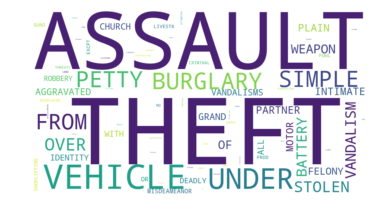

In [15]:
d = {}
k = list(df['Word'])
v = list(df['Count'])

for i in range(len(k)):
    d[k[i]] = v[i]
wordcloud = WordCloud(width=900,height=500, max_words=1628,background_color="white", relative_scaling=1,normalize_plurals=False,random_state=42).generate_from_frequencies(d)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
wordcloud.to_file("WordCount.png")

In [72]:
'''
def read_img_and_return_matrix(img_name):
    img_matrix = np.asmatrix(mpimg.imread(img_name))
    print(type(img_matrix))
    return img_matrix

def make_ImageColoredWordcloud(d, img_matrix, outputfile_name):
    wordcloud = WordCloud(width=900,height=500, max_words=1628, mask=img_matrix, relative_scaling=1,normalize_plurals=False,random_state=42).generate_from_frequencies(d)
    f = plt.figure(figsize=(20,20))
    plt.imshow(wordcloud.recolor(color_func = ImageColorGenerator(img_matrix)), interpolation = 'bilinear')
    plt.axis('off')
    plt.savefig(outputfile_name)
    
img_name = 'gun.png'
img_matrix = read_img_and_return_matrix(img_name)
make_ImageColoredWordcloud(d, img_matrix, 'coloredWordCloud.svg')
'''

"\ndef read_img_and_return_matrix(img_name):\n    img_matrix = np.asmatrix(mpimg.imread(img_name))\n    print(type(img_matrix))\n    return img_matrix\n\ndef make_ImageColoredWordcloud(d, img_matrix, outputfile_name):\n    wordcloud = WordCloud(width=900,height=500, max_words=1628, mask=img_matrix, relative_scaling=1,normalize_plurals=False,random_state=42).generate_from_frequencies(d)\n    f = plt.figure(figsize=(20,20))\n    plt.imshow(wordcloud.recolor(color_func = ImageColorGenerator(img_matrix)), interpolation = 'bilinear')\n    plt.axis('off')\n    plt.savefig(outputfile_name)\n    \nimg_name = 'gun.png'\nimg_matrix = read_img_and_return_matrix(img_name)\nmake_ImageColoredWordcloud(d, img_matrix, 'coloredWordCloud.svg')\n"

In [140]:
gun_mask = np.array(Image.open('gun.png'))
gun_mask

array([[[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       ...,

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]]], dtype=uint8)

In [141]:
def transform_format(val):
    if val.all() == 0:
        return 255
    else:
        return val

In [142]:
transformed_gun_mask = np.ndarray((gun_mask.shape[0], gun_mask.shape[1]), np.int32)

for i in range(len(gun_mask)):
    transformed_gun_mask[i] = list(map(transform_format, gun_mask[i]))

In [143]:
transformed_gun_mask

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]])

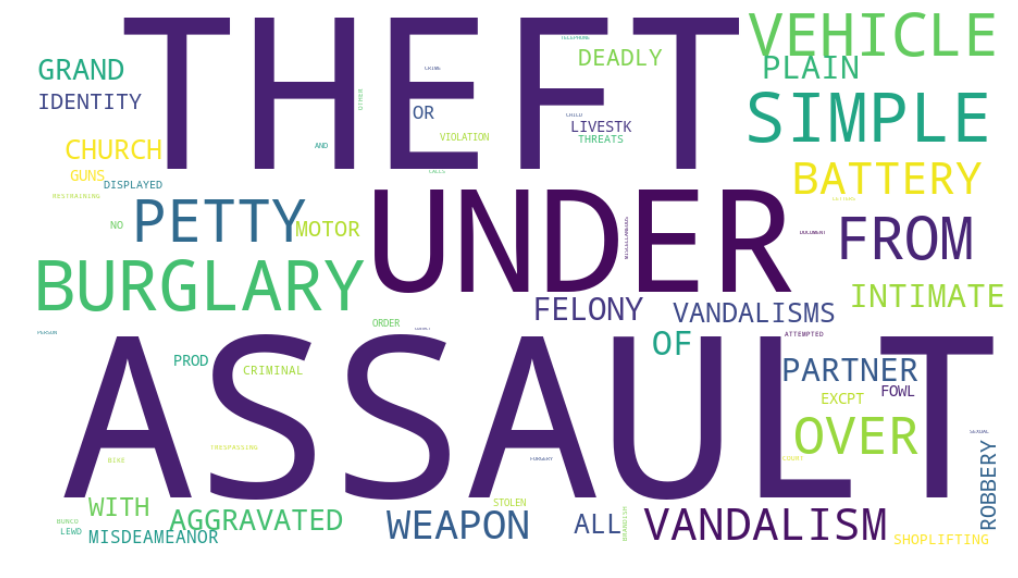

In [144]:
wc = WordCloud(background_color="white", max_words=1000, mask=transformed_gun_mask,
               stopwords=stopwords, contour_width=3, contour_color='firebrick')

# Generate a wordcloud
wc = WordCloud(width=900,height=500, max_words=1628,background_color="white", relative_scaling=1,normalize_plurals=False,random_state=42).generate_from_frequencies(d)

# store to file
wc.to_file("gunword.png")

# show
plt.figure(figsize=[20,10])
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()